In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import numpy as np # linear algebra
import pandas as pd
# import glob

In [6]:
train_dir= r"C:\Users\anmol\impli\xray_dataset_covid19\train"
test_dir= r"C:\Users\anmol\impli\xray_dataset_covid19\test"

In [7]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: C:\Users\anmol\impli


In [8]:
classes=os.listdir(train_dir)
print(classes)

['NORMAL', 'PNEUMONIA']


In [9]:
data_num=[0,0]
for cl in classes:
    data_num[0]+=len(os.listdir(os.path.join(train_dir,cl)))
    data_num[1]+=len(os.listdir(os.path.join(test_dir,cl)))

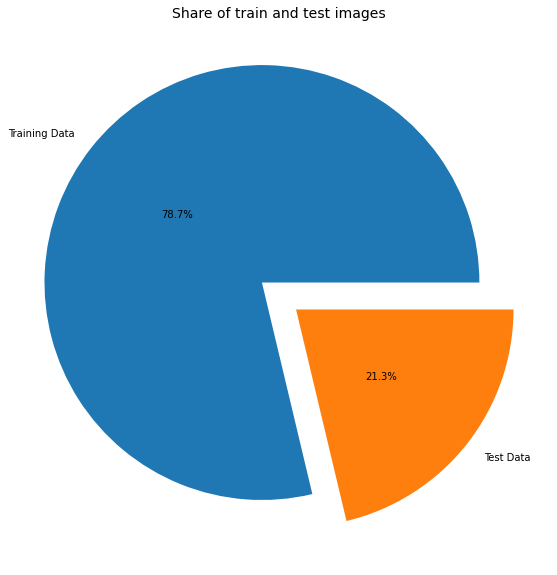

In [10]:
plt.figure(figsize=(15, 10))
plt.pie(x=np.array([x for x in data_num]), autopct="%.1f%%", explode=[0.1, 0.1], labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images", fontsize=14);

In [11]:
count={}
for x in classes:
    num=len(os.listdir(os.path.join(train_dir,x)))
    count[x]=num

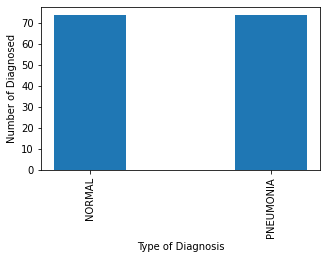

In [12]:
plt.figure(figsize=(5,3))
plt.bar(list(count.keys()), list(count.values()), width=0.4,align="center" )
plt.xticks(rotation=90)

plt.xlabel("Type of Diagnosis")
plt.ylabel("Number of Diagnosed")
plt.show()

In [13]:
IMG_WIDTH=224
IMG_HEIGHT=224

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)

BATCH_SIZE=16

seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [14]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 148 files belonging to 2 classes.
Using 119 files for training.
Found 148 files belonging to 2 classes.
Using 29 files for validation.
Found 40 files belonging to 2 classes.


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
IMAGE_SIZE = [224, 224] 

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

from glob import glob
import matplotlib.pyplot as plt

folders = glob('Datasets/impli/xray_dataset_covid19/train/*')

x = Flatten()(vgg.output)



# prediction = Dense(len(folders), activation='sigmoid')(x)
prediction = Dense(len(folders), activation='sigmoid')(x)
model.add(Dense(1,activation='sigmoid'))
# 1 the number of outputs 
model = Model(inputs=vgg.input, outputs=prediction)



NameError: name 'model' is not defined

In [17]:
EPOCH=50
STEPS=8


model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 14,739,777
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory(r"C:\Users\anmol\impli\xray_dataset_covid19\train",
#                                                  target_size = (224, 224),
#                                                  batch_size = 32,
#                                                  class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory(r"C:\Users\anmol\impli\xray_dataset_covid19\test",
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1.0/255.0, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1 #Shear angle in counter-clockwise direction in degrees
)
training_set=train_datagen.flow_from_directory(
    train_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)


Found 148 images belonging to 2 classes.


In [19]:
# Second for Testing data
test_datagen=ImageDataGenerator(
    rescale=1.0/255.0
)
test_set=test_datagen.flow_from_directory(
    test_dir,
    class_mode='binary',
    color_mode='rgb',
    batch_size=32,
    target_size=(1000,1000,3)[:2]
)

Found 40 images belonging to 2 classes.


In [ ]:
# history = model.fit(train_set, validation_data=val_set, steps_per_epoch = STEPS, epochs=EPOCH,callbacks=callback)

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),  
  validation_steps=len(test_set)
)

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

Epoch 1/5
